# Unencoded Projection

Quick code to show what a UMAP projection does for unencoded data.

In [2]:
%matplotlib inline

import pandas as pd
import os
import umap
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


WINDOW_SIZE = 3
LINE_WIDTH = 1

path = f"../BandData/Images/bands_{10 * LINE_WIDTH}width_{WINDOW_SIZE}eV_ml/class"


SEED = 42
np.random.seed(SEED)

c:\Users\Justin\Documents\Lehigh_REU\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


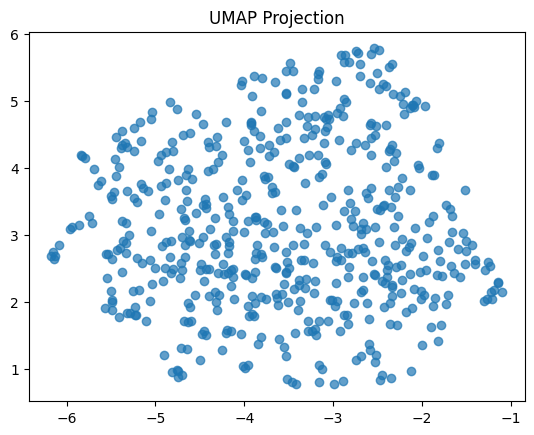

In [ ]:
dataframe = pd.DataFrame()

elements = []
item = []

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    if os.path.isfile(file_path):
        item.append(filename.split('.')[0])
        image = Image.open(os.path.join(path, filename)).convert("L")
        array = np.array(image)
        array = array.flatten()
        elements.append(array)

elements = np.array(elements)

dataframe['Material'] = item

reducer = umap.UMAP(
    n_neighbors = 10,
    min_dist    = 0.1,
    metric      = "minkowski",  
    random_state = 42
)

embedding = reducer.fit_transform(elements)

emb = embedding
plt.scatter(emb[:,0], emb[:,1], alpha=0.7)
plt.title("UMAP Projection")
plt.show()